# Extract the threshold between normal polygons and bananas

In [142]:
import geopandas
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy
import pandas

In [2]:
sample = geopandas.read_parquet("../data/sample.parquet")

In [5]:
sample.sort_values("FUA_p_2015").tail(20)

eFUA_ID  UC_num             UC_IDs              eFUA_name  Commuting  \
6559   5684.0     1.0               2414                  Okene        1.0   
4353   8862.0     1.0               7864               Thrissur        1.0   
691    7353.0     2.0          1429;1430                Aracaju        1.0   
4390   8948.0     1.0               7923              Alappuzha        1.0   
175    1467.0     1.0                991  San Miguel de Tucumán        1.0   
7335   3560.0     1.0               4028               Voronezh        1.0   
8540   6574.0     2.0            590;595           Jacksonville        1.0   
236     789.0     2.0        12970;12977               Adelaide        1.0   
8623   7312.0     3.0     1009;1012;1016             Providence        1.0   
6406    869.0     2.0        13129;13130               Auckland        1.0   
2007   9261.0     3.0  11705;11735;11738             Tianjia‘an        1.0   
234     360.0     1.0              11640                  Perth        1.0   
357    1160.0     2.0          2133;2149                Antwerp        1.0   
8593   7020.0     2.0            819;820             Pittsburgh        1.0   
2745    537.0     1.0               2749             Copenhagen        1.0   
731    1834.0     1.0               1799            Ouagadougou        1.0   
7520    153.0     1.0               1452                  Dakar        1.0   
8225   2203.0     2.0          3517;3527                   Kyiv        1.0   
244    1830.0     2.0        13042;13043                 Sydney        1.0   
8606   7165.0     4.0    898;911;920;933           Philadelphia        1.0   

     Cntry_ISO    Cntry_name  FUA_area  UC_area    FUA_p_2015     UC_p_2015  \
6559       NGA       Nigeria     348.0    117.0  8.758911e+05  8.092190e+05   
4353       IND         India     435.0    155.0  9.228168e+05  7.238619e+05   
691        BRA        Brazil     465.0    143.0  9.296397e+05  8.566381e+05   
4390       IND         India     399.0    194.0  9.394864e+05  8.167177e+05   
175        ARG     Argentina    1159.0    168.0  1.074939e+06  8.469250e+05   
7335       RUS        Russia    1305.0    229.0  1.099469e+06  8.568293e+05   
8540       USA  UnitedStates    3558.0    417.0  1.136540e+06  4.580812e+05   
236        AUS     Australia    4026.0    577.0  1.384068e+06  1.034974e+06   
8623       USA  UnitedStates    3751.0    503.0  1.448457e+06  7.525867e+05   
6406       NZL    NewZealand    2159.0    573.0  1.465958e+06  1.253144e+06   
2007       CHN         China     895.0    257.0  1.591003e+06  1.219485e+06   
234        AUS     Australia    2972.0    766.0  1.676529e+06  1.258344e+06   
357        BEL       Belgium    2393.0    429.0  1.817176e+06  8.764264e+05   
8593       USA  UnitedStates    6150.0    550.0  1.980861e+06  7.650652e+05   
2745       DNK       Denmark    3406.0    387.0  1.987482e+06  1.225959e+06   
731        BFA   BurkinaFaso     908.0    345.0  2.813684e+06  2.704697e+06   
7520       SEN       Senegal     388.0    277.0  3.409806e+06  3.358310e+06   
8225       UKR       Ukraine    3385.0    546.0  3.438138e+06  2.865593e+06   
244        AUS     Australia    3881.0   1416.0  4.404986e+06  3.851398e+06   
8606       USA  UnitedStates   11525.0   1732.0  6.113871e+06  3.502597e+06   

        Com_p_2015                                           geometry  \
6559  6.667205e+04  POLYGON ((6.35066 7.62723, 6.34062 7.62723, 6....   
4353  1.989549e+05  POLYGON ((76.23650 10.65888, 76.24658 10.65888...   
691   7.300161e+04  POLYGON ((-37.15612 -10.80544, -37.12585 -10.8...   
4390  1.227687e+05  POLYGON ((76.34579 9.76377, 76.35585 9.76377, ...   
175   2.280140e+05  POLYGON ((-65.20877 -26.63894, -65.19808 -26.6...   
7335  2.426401e+05  POLYGON ((39.22606 51.93910, 39.23956 51.93910...   
8540  6.784588e+05  POLYGON ((-81.86229 30.67702, -81.79656 30.677...   
236   3.490944e+05  POLYGON ((138.58699 -34.44043, 138.73317 -34.4...   
8623  6.958699e+05  POLYGON ((-71.50223 42.15660, 

In [139]:
polygons = geopandas.read_parquet(f"../data/{int(2203.0)}/polygons.parquet")

In [143]:
all_poly_data = pandas.concat([geopandas.read_parquet(f"../data/{int(fua_id)}/polygons.parquet") for fua_id in sample.eFUA_ID])

(0.0, 400.0)

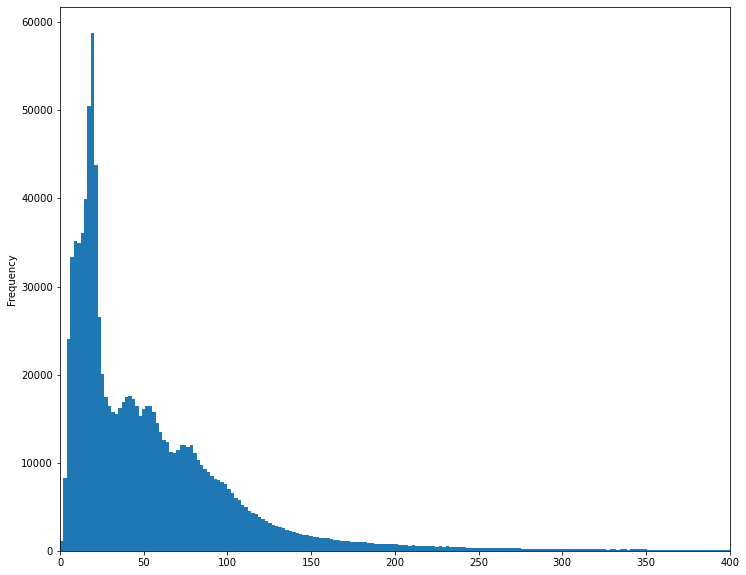

In [144]:
all_poly_data.shape_index.plot.hist(figsize=(12, 10), bins=5000)
plt.xlim(0, 400)

In [77]:
data = polygons.shape_index.values
data = data[data < 200].reshape(-1, 1)

In [124]:
kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(data)

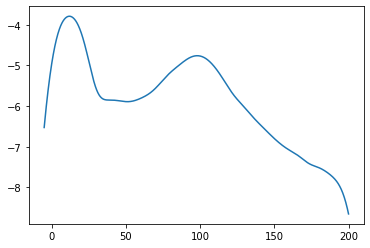

In [128]:
s = numpy.linspace(-5, 200, 1000)
e = kde.score_samples(s.reshape(-1,1))
plt.plot(s, e)

In [129]:
from scipy.signal import argrelextrema

In [130]:
mi, ma = argrelextrema(e, numpy.less)[0], argrelextrema(e, numpy.greater)[0]

In [132]:
s[mi]

array([51.02102102])

In [133]:
s[ma]

array([12.03203203, 98.01301301])

In [141]:
polygons.query("shape_index < 30").explore(prefer_canvas=True)